In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

In [2]:
df = pd.read_csv('Enumerated dataset.csv')
df.head()

,Age,Education level,Number of use Internet and Internet-related services,Internet/ Digital devices skills level,Secure of person's digital devices,Legitimacy of a website,Password with personal information,Aware of the danger of clicking pop-up screens,Attention to person's account privacy,Protection of social media services for personal info,...,blogs1,etc.1,Government websites (e.g. CERT)1,I do not feel that I keep myself updated1,Rely on automatic updates1,Internet service provider ISPs1,Other- Messages from Communication Company1,Others: Twitter1,Other- Twitter1,etc..1
0,0,3,2,1,3,4,0,4,4,2,...,1,1,0,0,0,0,0,0,0,0
1,0,2,2,1,4,0,4,4,4,3,...,1,1,0,0,0,0,0,0,0,0
2,0,2,2,1,4,3,3,4,4,3,...,1,1,0,0,0,0,0,0,0,0
3,0,2,2,1,4,2,0,3,1,3,...,1,1,0,0,0,0,0,0,0,0
4,0,2,2,1,4,3,1,4,3,2,...,1,1,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1213, 224)

In [4]:
# Checking the correlation for the data of our target ( Victim of cybercrime )
#The dataset contain too many columns, correlation map will not be useful

df.corrwith(df["Victim of cybercrime"]).sort_values( ascending=False)

Victim of cybercrime                                                                                 1.000000
Bank                                                                                                 0.145149
Online personal information is not secure enough                                                     0.135610
No one                                                                                               0.109586
Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime    0.105763
                                                                                                       ...   
I don't know.1                                                                                      -0.086462
Don’t know but will ask my friends for advice                                                       -0.106505
Well protected against cybercrime                                                                   -0.106858
Laws are e

In [5]:
# Finding the best features to use for the traning and store it

corrArray=df.corrwith(df['Victim of cybercrime']).sort_values( ascending=False)

# pick the best 20 columns. 10 from the top and 10 from the last
first10=corrArray[1:11]
first10= list(first10.index)
first10

['Bank',
 'Online personal information is not secure enough',
 'No one',
 'Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime',
 'Education level',
 'Role of the government in combating cybercrimes_No role',
 'Apple store',
 'Education',
 'Government or professional reports',
 'PIN)']

In [6]:
# Finding the best features to use for the traning and store it

corrArray=df.corrwith(df['Victim of cybercrime']).sort_values( ascending=False)

# pick the best 20 columns. 10 from the top and 10 from the last
last10=corrArray[-10:]
last10= list(last10.index)
last10

['Legitimacy of a website',
 'Role of the government in combating cybercrimes_Have stricter laws and punishments for cyber crimes',
 'Concerned about encountering material promotes hatred or religious extremism',
 'Concerned about receiving phishing emails',
 'I do not feel that I keep myself updated',
 "I don't know.1",
 'Don’t know but will ask my friends for advice',
 'Well protected against cybercrime',
 'Laws are effective in managing the cybercrime problem',
 'Report cybercrime']

## PCA

In [7]:
# Selecting features
# Save X data
X = df[first10 + last10]

# Encode our target
le = LabelEncoder()
y = le.fit_transform(df['Victim of cybercrime'])

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [9]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [10]:
# components
pca.components_

array([[ 1.19283394e-03, -1.16299418e-02,  4.77764630e-04,
        -9.11989399e-02,  7.97634201e-02,  3.15501862e-03,
         3.76295062e-03,  5.98885265e-02,  1.01724273e-02,
         5.90909337e-02, -3.46573423e-01, -6.89264022e-02,
         7.67673494e-02,  8.98258943e-02,  5.22402967e-02,
         7.93048456e-03,  5.20983729e-02, -6.76306336e-01,
        -6.10647621e-01, -5.80070222e-02],
       [ 7.48432265e-04, -7.35048296e-01,  1.29775609e-03,
        -3.58869321e-01, -6.01521670e-02,  3.47230838e-03,
        -3.88619049e-03, -7.82855351e-02, -7.20590085e-02,
        -4.20343919e-02, -2.26453523e-01, -1.93552234e-02,
         2.79834833e-01,  2.61816901e-01,  7.48590944e-02,
         4.66658019e-02,  2.36149598e-02,  3.11977625e-01,
        -8.95378273e-02,  4.45348800e-02],
       [-2.57319226e-03, -3.64845791e-01,  1.29777327e-03,
         2.83990080e-01,  1.02372544e-01,  2.09100070e-02,
         4.52743006e-03,  7.72990560e-02,  1.66996405e-01,
         9.03400962e-02,  4.9

In [11]:
pd.Series(pca.explained_variance_ratio_) 

0     0.200573
1     0.167901
2     0.103961
3     0.086771
4     0.084029
5     0.066328
6     0.047250
7     0.042364
8     0.035266
9     0.029947
10    0.028501
11    0.026934
12    0.021733
13    0.020974
14    0.014550
15    0.014227
16    0.007190
17    0.000748
18    0.000383
19    0.000373
dtype: float64

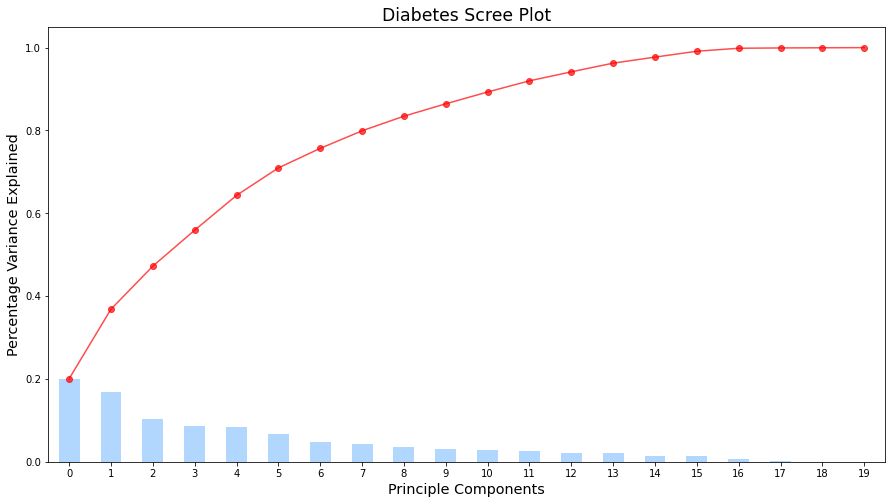

In [12]:
plt.style.use("seaborn-pastel")
plt.figure(figsize=(15,8))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'red' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [13]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [14]:
# Fit PCA
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Created two model to compare training time
logreg_noPCA = LogisticRegression(max_iter=1230) # Set max_iter so model reaches convergence

logreg = LogisticRegression()

In [15]:
# Measure how long it takes to train WITHOUT PCA

print('Measure how long it takes to train WITHOUT PCA')
%timeit logreg_noPCA.fit(X_train, y_train)

print()

# Measure how long it takes to train with PCA

print('Measure how long it takes to train WITH PCA')
%timeit logreg.fit(X_train_pca, y_train)

Measure how long it takes to train WITHOUT PCA
15.8 ms ± 472 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Measure how long it takes to train WITH PCA
4.3 ms ± 94.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
# PCA Model
print('PCA Training accuracy:',logreg.score(X_train_pca, y_train)) 
print('PCA Testing accuracy:', logreg.score(X_test_pca, y_test))

PCA Training accuracy: 0.9350515463917526
PCA Testing accuracy: 0.9300411522633745


## KMeans

### Elbow Graph

In [18]:
df1 = df.copy()

X1= df1.drop('Victim of cybercrime',axis=1)

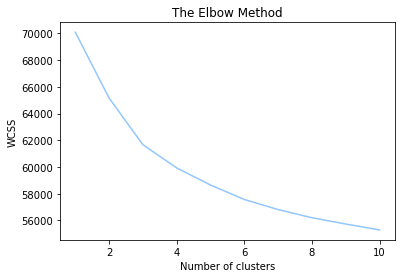

In [19]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 3  

In [20]:
kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(X1)

df1['Cluster'] = y

print(df1.head())

   Age  Education level  Number of use Internet and Internet-related services  \
0    0                3                                                  2      
1    0                2                                                  2      
2    0                2                                                  2      
3    0                2                                                  2      
4    0                2                                                  2      

   Internet/ Digital devices skills level  Secure of person's digital devices  \
0                                       1                                   3   
1                                       1                                   4   
2                                       1                                   4   
3                                       1                                   4   
4                                       1                                   4   

   Legitimacy of a website

<AxesSubplot:xlabel='component1', ylabel='component2'>

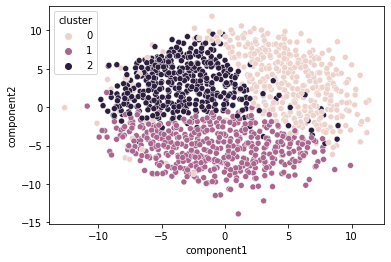

In [21]:

embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(df1.drop(['Cluster','Victim of cybercrime'],axis=1)),
             columns = ['component1','component2'])
mds['cluster'] = df1['Cluster'] 

sns.scatterplot(data=mds,x = "component1",y="component2",hue="cluster")